#  General PipeLine for A Algorithm in MachineLearning
the complete structure of a machine‑learning pipeline, from installing dependencies to visualizing outputs.

# 1. Installing libraries
Install all required dependencies (run **once**).

In [ ]:
# Install core libraries
# !pip install numpy pandas scikit-learn matplotlib seaborn
# !pip install seaborn

# 2. Importing libraries
Importing All librairies that we need 

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# 3 Dataset

## 3.1 Importing the dataset Housing
Load your dataset (CSV, Parquet, SQL, etc.).



In [10]:

# Example: read a CSV file
df = pd.read_csv(r'../datasets/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 3.2 Data exploration and cleaning(Housing)
Inspect statistical summaries and handle missing values or outliers.

In [3]:
# Quick data overview
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### 3.3 Check for Missing VALUES
Count how many Missing Values (null) Exist in each column

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# 4 Visualisation Of Data

## 4.1 Univariate Analysis

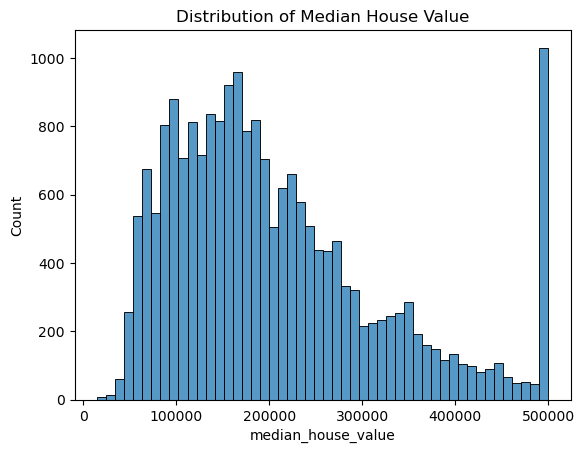

In [18]:


sns.histplot(df['median_house_value'], bins=50)
plt.title('Distribution of Median House Value')
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

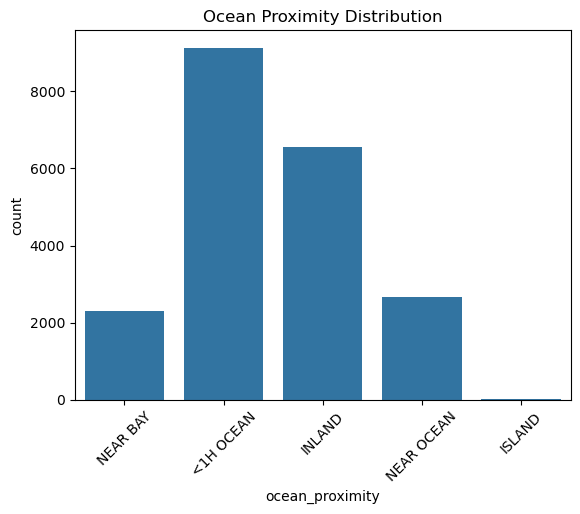

In [19]:
sns.countplot(x='ocean_proximity', data=df)
plt.title('Ocean Proximity Distribution')
plt.xticks(rotation=45)

## 4.2 Bivariate - Multivariate Analysis 


Text(0.5, 1.0, 'Median Income vs Median House Value')

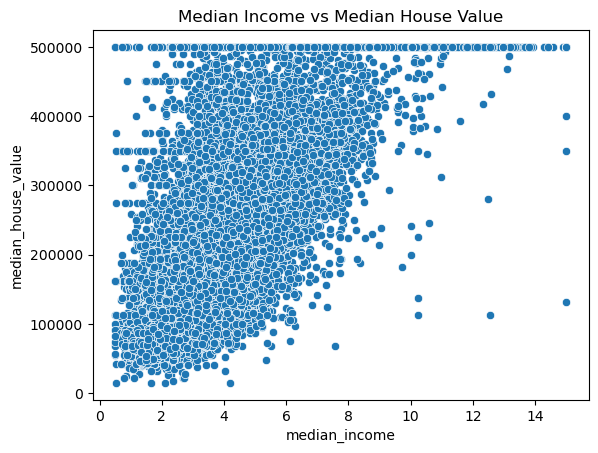

In [22]:
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Median Income vs Median House Value')

Text(0.5, 1.0, 'Correlation Heatmap')

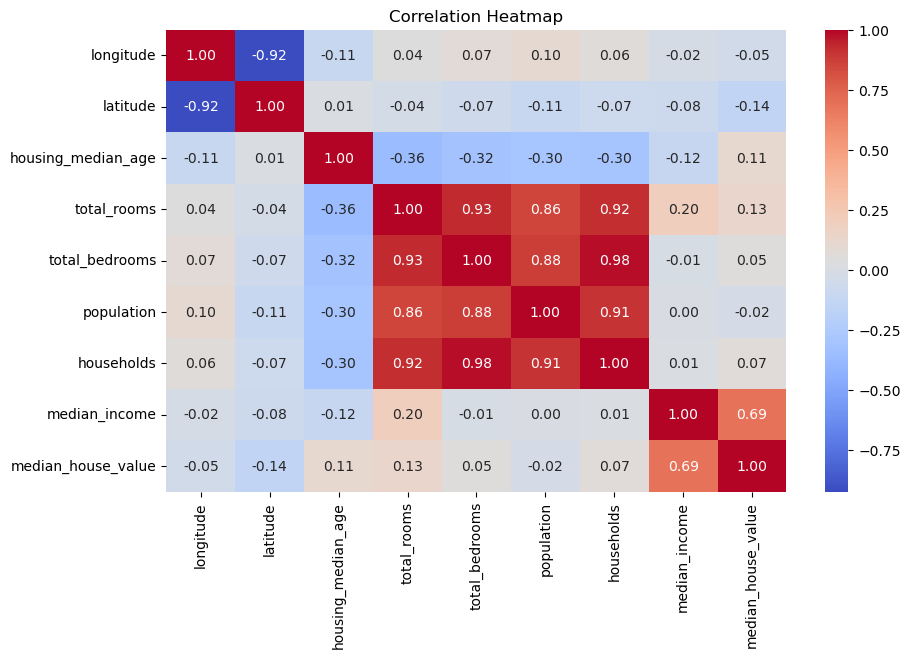

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')

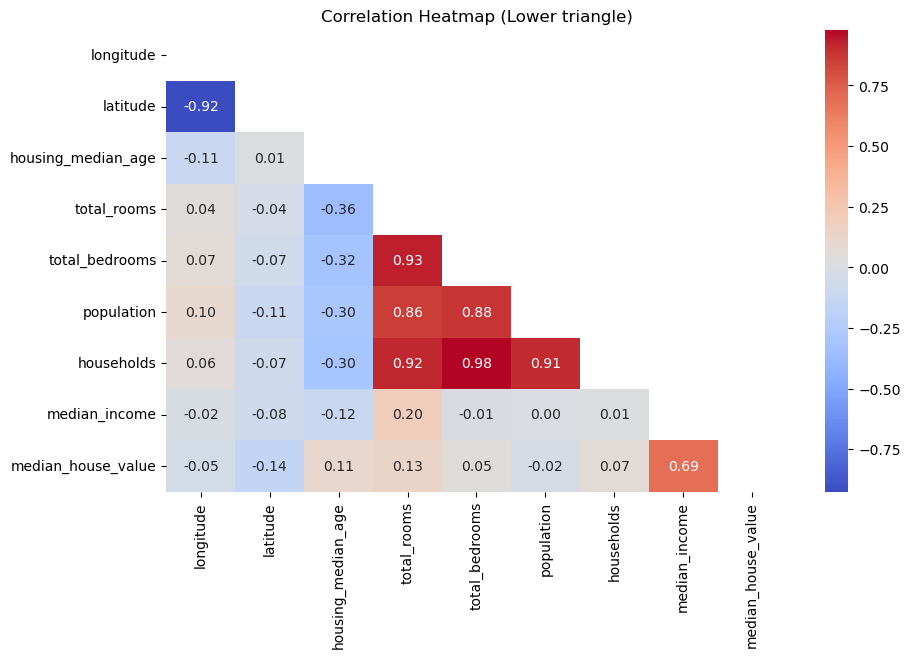

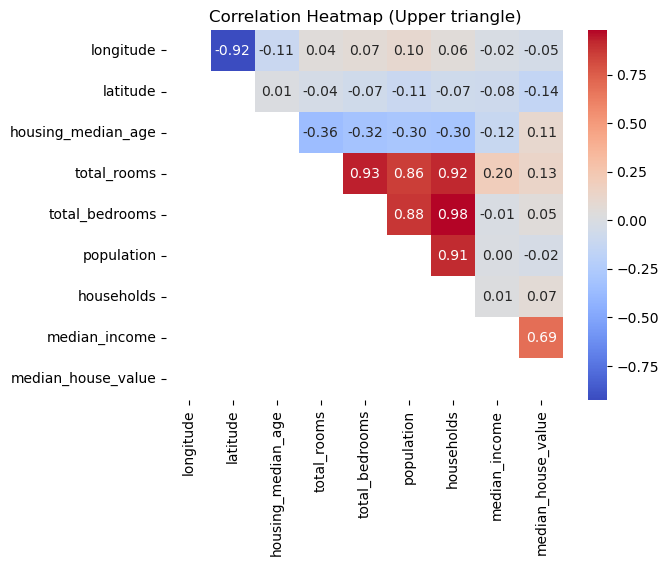

In [28]:
# Upper part of correlation heatmap  --------------------------------------------------------------------------------------------------------


plt.figure(figsize=(10, 6))

# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Création du masque pour cacher la partie supérieure
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heatmap avec le masque
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)

plt.title('Correlation Heatmap (Lower triangle)')
plt.show()


# OR --------------------------------------------------------------------------------------------------------

# lower part of correlation heatmap  --------------------------------------------------------------------------------------------------------

# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Création du masque pour cacher la partie inférieure
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

# Heatmap avec le masque
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)

plt.title('Correlation Heatmap (Upper triangle)')
plt.show()



# 5 Preprocessing The DATA


## 5 Preprocessing The DATA

In [7]:

# Quick data overview
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 5.1 Importing the dataset (Classic_Rock)
Load your dataset (CSV, Parquet, SQL, etc.). Number3 'classic_rock'

In [10]:
import sqlite3


# Example: read a CSV file
# Connexion à la base de données SQLite
conn = sqlite3.connect(r'../datasets/classic_rock.db')

# Afficher les tables disponibles
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables disponibles :", tables['name'].tolist())

# Exemple : lire une table nommée 'tracks'
tracks_df = pd.read_sql_query("SELECT * from rock_songs ", conn)

conn.close()
tracks_df.head()


Tables disponibles : ['rock_songs', 'rock_plays']


,Song,Artist,Release_Year,PlayCount
0,Caught Up in You,.38 Special,1982.0,82
1,Hold On Loosely,.38 Special,1981.0,85
2,Rockin' Into the Night,.38 Special,1980.0,18
3,Art For Arts Sake,10cc,1975.0,1
4,Kryptonite,3 Doors Down,2000.0,13


# 5.2 Importing the dataset
Load your dataset (CSV, Parquet, SQL, etc.). Number2 'Classic_rock'

In [21]:
tracks_df.describe(include='all')

,Song,Artist,Release_Year,PlayCount
count,1650,1650,1650.000000,1650.000000
unique,1621,385,NaN,NaN
top,Stop Draggin' My Heart Around,The Beatles,NaN,NaN
freq,3,96,NaN,NaN
mean,NaN,NaN,1978.570303,20.332121
std,NaN,NaN,9.312522,27.513446
min,NaN,NaN,1955.000000,0.000000
25%,NaN,NaN,1971.000000,2.000000
50%,NaN,NaN,1977.000000,7.000000
75%,NaN,NaN,1984.000000,28.000000


In [11]:
# Read the text file as a list of class names (one per line)
with open(r'../datasets/imagenet_class_names.txt', 'r') as f:
	class_names = [line.strip() for line in f]

# Display the first few class names
print(class_names[:5])

['n01440764 tench, Tinca tinca', 'n01443537 goldfish, Carassius auratus', 'n01484850 great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'n01491361 tiger shark, Galeocerdo cuvieri', 'n01494475 hammerhead, hammerhead shark']


In [7]:
# Quick data overview for class_names (which is a list)
print(f"Number of class names: {len(class_names)}")
print(f"First 5 class names: {class_names[:5]}")

Number of class names: 1000
First 5 class names: ['n01440764 tench, Tinca tinca', 'n01443537 goldfish, Carassius auratus', 'n01484850 great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'n01491361 tiger shark, Galeocerdo cuvieri', 'n01494475 hammerhead, hammerhead shark']
